


# The selection of words is important, and it should show Trump's intentions when using them, so I decided to use association rule mining to find words that are highly associated. 

**The code regarding association rules mining are at the end of this notebook.
previous code block are pre=processing and topic modeling of the data.**




In [1]:
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.image as mpimg
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

#### Data Resource : https://www.thetrumparchive.com/
        

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
trump = pd.read_csv('/content/drive/Shared drives/256 Project/tweets_11-06.csv')

In [5]:
trump

,id,text,isRetweet,isDeleted,device,favorites,retweets,date
0,98454970654916608,Republicans and Democrats have both created ou...,f,f,TweetDeck,49,255,2011-08-02 18:07:48
1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58
4,1218159531554897920,RT @MZHemingway: Very friendly telling of even...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59
...,...,...,...,...,...,...,...,...
55085,1319485303363571714,RT @RandPaul: I don’t know why @JoeBiden think...,t,f,Twitter for iPhone,0,20683,2020-10-23 03:46:25
55086,1319484210101379072,RT @EliseStefanik: President @realDonaldTrump ...,t,f,Twitter for iPhone,0,9869,2020-10-23 03:42:05
55087,1319444420861829121,RT @TeamTrump: LIVE: Presidential Debate #Deba...,t,f,Twitter for iPhone,0,8197,2020-10-23 01:03:58
55088,1319384118849949702,Just signed an order to support the workers of...,f,f,Twitter for iPhone,176289,36001,2020-10-22 21:04:21


# Base Emotion Extraction algorithm

In [8]:
dictionary = pd.read_csv('/content/drive/Shared drives/256 Project/trump_dict.csv')

In [9]:
df = {}
for ind in dictionary.index:
    df[dictionary['Word'][ind]] = dictionary['Emotion'][ind]

In [10]:



def removing_shortcuts(text):
    full_words = []
    shortcuts = {'y': 'why', 'hw': 'how', 'k': 'okay',
                 'idc': "i do not care", 'ty': 'thank you', 'wlcm': 'welcome', 'bc': 'because', 'xoxo': 'love',
                 'ttyl': 'talk to you later', 'bday': 'birthday', 'awsm': 'awesome', 'gud': 'good',
                 'lv': 'love', 'dm': 'direct message', 'rt': 'retweet', 'wtf': 'hate', 'idgaf': 'hate',
                 'irl': 'in real life', 'yolo': 'you only live once', "don't": "do not",
                 "won't": "will not", 'tbh': 'to be honest', 'caj': 'casual', 'Ikr': 'I know, right?',
                 'omw': 'on my way','ofc': 'of course', 'Idc': "I do not care", 'Irl': 'In real life', 'tbf': 'To be fair',
                 'obvs': 'obviously', 'v': 'very', 'atm': 'at the moment',
                 'col': 'crying out loud', 'gbu': 'god bless you', 'gby': 'god bless you', 'gotcha': 'I got you',
                 'hehe': 'laughing', 'haha': 'laughing', 'hf': 'have fun',
                 'hry': 'hurry', 'idc': 'i do not care', 'ikr': 'i know right',
                 'lmao': 'laughing my ass off', 'lol': 'laughing out loud',
                 'n1': 'nice one', 'na': 'not available', 'rip': 'rest in peace',
                 'sry': 'sorry', 'tc': 'take care',
                 'thnks': 'thanks', 'thx': 'thanks', 'thnk': 'thanks', 'ttyl': 'talk to you later',
                 'ugh': 'disgusted'}

    for token in text:
        if token in shortcuts.keys():
            token = shortcuts[token]
        full_words.append(token)
    text = " ".join(full_words)
    return text


def removing_stopwords(text):
    stop_words = ['retweet','amp','make','realdonaldtrump','myself', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'are', 'was', 'were', 'been', 'being', 'have', 'has', 'had', 'having', 'does', 'did', 'doing', 'the', 'and', 'but', 'because', 'until', 'while', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below','from', 'down', 'out', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'not', 'only', 'own', 'same', 'than', 'too', 'very', 'can', 'will', 'just', "should've", 'now', 'are', 'could', 'did','does', 'had', 'has', 'have', 'might', 'must', 'need', "shall", "should", 'was', "were", "would"]
    return [word for word in text if (word not in stop_words) and (len(word)>2)]


def lemmatization(words_big):
    lemma = WordNetLemmatizer()
    stemmed_words = [lemma.lemmatize(word, 'v') for word in words_big]
    stemmed_words = [lemma.lemmatize(word, 'n') for word in stemmed_words]
    return " ".join(stemmed_words)


def removing_not(text):
    d = {'not sad': 'Happy', 'not bad': 'Happy', 'not boring': 'Happy', 'not wrong': 'Happy', 'not bored': 'Happy',
         'not jealous': 'Happy', 'not happy': 'Sad', 'not well': 'Sad', 'not suitable': 'Angry', 'not right': 'Angry',
         'not good': 'Sad', 'not excited': 'Angry', 'not funny ': 'Sad', 'not  kind': 'Sad', 'not proud': 'Angry',
         'not cool': 'Angry', 'not funny': 'Angry', 'not kind': 'Angry', 'not open': 'Angry', 'not safe': 'Fear',
         'not enough': 'Empty', 'not know': 'Sad', 'not knowing': 'Sad', 'not believe': 'Angry',
         'not believing': 'Angry',
         'not understand': 'Sad', 'not understanding': 'Sad', 'no doubt': 'Happy', 'not think': 'Sad',
         'not thinking': 'Sad',
         'not recognise': 'Sad', 'not recognising': 'Sad', 'not forget': 'Angry', 'not forgetting': 'Angry',
         'not remember': 'Sad',
         'not remembering': 'Sad', 'not imagine': 'Sad', 'not imagining': 'Sad', 'not mean': 'Sad',
         'not meaning': 'Sad',
         'not agree': 'Angry', 'not agreeing': 'Sad', 'not disagree': 'Happy', 'not disagreeing': 'Happy',
         'not deny': 'Sad',
         'not denying': 'Sad', 'not promise': 'Angry', 'not promising': 'Angry', 'not satisfy': 'Sad',
         'not satisfying': 'Sad',
         'not realise': 'Sad', 'not realising': 'Sad', 'not appear': 'Angry', 'not appearing': 'Angry',
         'not please': 'Sad', 'not pleasing': 'Sad', 'not impress': 'Sad', 'not impressing': 'Sad',
         'not surprise': 'Sad', 'not surprising': 'Sad', 'not concern': 'Sad', 'not concerning': 'Sad',
         'not have': 'Sad', 'not having': 'Sad',
         'not own': 'Sad', 'not owning': 'Sad', 'not possess': 'Sad', 'not possessing': 'Sad', 'not lack': 'Sad',
         'not lacking': 'Sad',
         'not consist': 'Sad', 'not consisting': 'Sad', 'not involve': 'Sad', 'not involving': 'Sad',
         'not include': 'Sad', 'not including': 'Sad', 'not contain': 'Sad',
         'not containing': 'Sad', 'not love': 'Sad', 'not like': 'Angry',
         'not hate': 'Happy', 'not hating': 'Happy', 'not adore': 'Sad', 'not adoring': 'Sad', 'not prefer': 'Sad',
         'not preferring': 'Sad', 'not care': 'Angry', 'not mind': 'Angry', 'not minding': 'Sad',
         'not want': 'Angry', 'not wanting': 'Sad',
         'not need': 'Angry', 'not needing': 'Angry', 'not desire': 'Sad', 'not desiring': 'Sad', 'not wish': 'Sad',
         'not wishing': 'Sad', 'not hope': 'Sad', 'not hoping': 'Sad', 'not appreciate': 'Sad',
         'not appreciating': 'Sad',
         'not value': 'Sad', 'not valuing': 'Sad', 'not owe': 'Sad', 'not owing': 'Sad', 'not seem': 'Sad',
         'not seeming': 'Sad', 'not fit': 'Sad', 'not fitting': 'Sad', 'not depend': 'Sad',
         'not depending': 'Sad', 'not matter': 'Sad', 'not afford': 'Sad', 'not affording': 'Sad', 'not aim': 'Sad',
         'not aiming': 'Sad', 'not attempt': 'Angry', 'not attempting': 'Angry', 'not ask': 'Angry',
         'not asking': 'Angry', 'not arrange': 'Angry', 'not arranging': 'Angry', 'not beg': 'Angry',
         'not begging': 'Angry', 'not begin': 'Angry', 'not beginning': 'Angry', 'not caring': 'Angry',
         'not choose': 'Angry', 'not choosing': 'Angry', 'not claim': 'Angry', 'not claiming': 'Angry',
         'not consent': 'Angry', 'not consenting': 'Angry', 'not continue': 'Angry', 'not continuing': 'Angry',
         'not dare': 'Angry', 'not daring': 'Angry', 'not decide': 'Sad',
         'not deciding': 'Sad', 'not demand': 'Angry', 'not demanding': 'Angry', 'not deserve': 'Angry',
         'not deserving': 'Angry', 'not expect': 'Angry',
         'not expecting': 'Angry', 'not fail': 'Happy', 'not failing': 'Happy', 'not get': 'Sad', 'not getting': 'Sad',
         'not hesitate': 'Sad', 'not hesitating': 'Sad', 'not hurry': 'Happy', 'not hurrying': 'Happy',
         'not intend': 'Sad', 'not intending': 'Sad', 'not learn': 'Angry', 'not learning': 'Angry',
         'not liking': 'Angry', 'not loving': 'Sad', 'not manage': 'Angry',
         'not managing': 'Angry', 'not neglect': 'Sad', 'not neglecting': 'Sad', 'not offer': 'Angry',
         'not offering': 'Angry',
         'not plan': 'Angry', 'not planing': 'Angry', 'not prepare': 'Angry',
         'not preparing': 'Angry', 'not pretend': 'Angry', 'not pretending': 'Angry', 'not proceed': 'Angry',
         'not proceeding': 'Angry',
         'not propose': 'Angry', 'not proposing': 'Sad', 'not refuse': 'Sad', 'not refusing': 'Sad',
         'not start': 'Sad',
         'not starting': 'Sad', 'not stop': 'Happy', 'not stopping': 'Happy', 'not struggle': 'Angry',
         'not struggling': 'Angry',
         'not swear': 'Angry', 'not swearing': 'Angry', 'not threaten': 'Happy', 'not threatening': 'Happy',
         'not try': 'Angry', 'not trying': 'Angry', 'not volunteer': 'Angry',
         'not volunteering': 'Angry', 'not wait': 'Angry', 'not waiting': 'Angry', 'not feel': 'Sad',
         'not feeling': 'Sad'}

    f = re.findall("not\s\w+", text)
    for i in f:
        try:
            text = text.replace(i, d[i])
        except:
            pass
    text = text.lower()
    return text


def determine_not(text):
    not_location  = text.find('not') + 4
    d = 0
    for j in text[not_location:].split():
        if j in df:
            opposite = {"Happy": "sad", "Angry": "pleased", "Surprise": "expected", "Sad": "happy", "Fear": "calm"}
            text = re.sub(rf'not(.*){j}', opposite[df[j]], text)
            d = 1
            break
        if '.' in j:
            d = 1
            break
    if d == 0:
      text = text.replace(' not',"")
    return text


def removing_contradictions(text):
    if text.count("n't"):
        text = text.replace("n't", " not")
    text = re.sub("ai\snot", "am not", text)
    text = re.sub("wo\snot", "will not", text)
    return text

def cleaning(text):
    text = text.lower()
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = removing_contradictions(text)
    text = removing_not(text)
    text = text.split()
    text = removing_shortcuts(text)
    if "not" in text.split():
        text = determine_not(text)
    if "not" in text.split():
        text = determine_not(text)
    text = re.sub(r"[^a-zA-Z\'!]+", ' ', text)
    text = word_tokenize(text)
    words_big = removing_stopwords(text)
    clean_text = lemmatization(words_big)
    clean_text = re.sub('\s+',' ',clean_text)
    return clean_text



def get_emotion(input):
    text = cleaning(input).split()
    emotion_values = []
    emotions = {"Happy": 0, "Angry": 0, "Surprise": 0, "Sad": 0, "Fear": 0}
    y = 0
    try:
        for i in text:
            try:
                emotions[df[i]] += 1
            except:
                pass
        # emotions['Happy'] *= w1 
        # emotions['Angry'] *= w2 
        # emotions['Surprise'] *= w3 
        # emotions['Sad'] *= w4 
        # emotions['Fear'] *= w5
        if sum(emotions.values()) == 0:
            return emotions
        for i in emotions:
            emotion_values.append(round((emotions[i] / sum(emotions.values())), 2))
        for j in emotions:
            emotions[j] = emotion_values[y]
            y += 1
        return emotions
    except:
        pass

Key Features of the improved Alogrithm:

1.   Shifting from list based word corpus to dictionary resulted in improved response time. O(n) to O(1) Search time
2.   Reduced keywords in stopwords and shortcuts to optimise response.
3.   Refracting code making it more generalized while having minimal impact on excecution time.
4.   Adding dataset based "Trump weights" to improve prediction

# Need for a better negation Handling

In [11]:
count = 0
for ind in trump.index:
    text = trump['text'][ind]
    text = text.lower()
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = removing_contradictions(text)
    text = removing_not(text)
    text = text.split()
    text = removing_shortcuts(text)
    if "not" in text.split():
        count +=1

print(count)

4719


This shows that ~ 10% of the tweets still have unhandled negation 

In [12]:
count = 0
for ind in trump.index:
    text = trump['text'][ind]
    text = text.lower()
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = removing_contradictions(text)
    text = removing_not(text)
    text = text.split()
    text = removing_shortcuts(text)
    if "not" in text.split():
        text = determine_not(text)
    if "not" in text.split():
        text = determine_not(text)
    if "not" in text.split():
        count +=1

print(count)

1116


This enhancement helps in reducing the negation issue to ~2% 

# Implementation of Base text2emotion


In [15]:
!pip install text2emotion
import text2emotion as te

     |████████████████████████████████| 61kB 3.8MB/s 
     |████████████████████████████████| 51kB 4.2MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49716 sha256=7faed210653a946ae843554762e465db95810e2643792d23b97783e42188c02c
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
# We defined a cleaning() function for preprocessing data, and achived faster run time, the clean text have further analysis usage
clean_tw = []
for ind in trump.index:
    clean_tw.append(cleaning(trump['text'][ind]))

In [ ]:
# Implementation of basic text2emotion
for i in range(10):
    print(trump['text'][i])
    print(te.get_emotion(trump['text'][i]))
    print()

Republicans and Democrats have both created our economic problems.
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}

I was thrilled to be back in the Great city of Charlotte, North Carolina with thousands of hardworking American Patriots who love our Country, cherish our values, respect our laws, and always put AMERICA FIRST! Thank you for a wonderful evening!! #KAG2020 https://t.co/dNJZfRsl9y
{'Happy': 0.36, 'Angry': 0.0, 'Surprise': 0.36, 'Sad': 0.27, 'Fear': 0.0}

RT @CBS_Herridge: READ: Letter to surveillance court obtained by CBS News questions where there will be further disciplinary action and cho…
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}

The Unsolicited Mail In Ballot Scam is a major threat to our Democracy, &amp; the Democrats know it. Almost all recent elections using this system, even though much smaller &amp;  with far fewer Ballots to count, have ended up being a disaster. Large numbers of missing Ballots &amp; Fraud!
{'

In [ ]:
# Our upgraded get_emotion() function already includes Cleaning function.
for i in range(10):
    print(trump['text'][i])
    print(get_emotion(trump['text'][i]))
    print()

Republicans and Democrats have both created our economic problems.
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}

I was thrilled to be back in the Great city of Charlotte, North Carolina with thousands of hardworking American Patriots who love our Country, cherish our values, respect our laws, and always put AMERICA FIRST! Thank you for a wonderful evening!! #KAG2020 https://t.co/dNJZfRsl9y
{'Happy': 0.42, 'Angry': 0.0, 'Surprise': 0.33, 'Sad': 0.25, 'Fear': 0.0}

RT @CBS_Herridge: READ: Letter to surveillance court obtained by CBS News questions where there will be further disciplinary action and cho…
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}

The Unsolicited Mail In Ballot Scam is a major threat to our Democracy, &amp; the Democrats know it. Almost all recent elections using this system, even though much smaller &amp;  with far fewer Ballots to count, have ended up being a disaster. Large numbers of missing Ballots &amp; Fraud!
{'

In [ ]:
trump['text'][1]

'I was thrilled to be back in the Great city of Charlotte, North Carolina with thousands of hardworking American Patriots who love our Country, cherish our values, respect our laws, and always put AMERICA FIRST! Thank you for a wonderful evening!! #KAG2020 https://t.co/dNJZfRsl9y'

In [ ]:
clean_tw[1]

'thrill back great city charlotte north carolina thousand hardworking american patriot love country cherish value respect law always put america first thank wonderful even kag'

# Topic Modeling

* In this section, we are going to analyze the main topics of Trump's tweets. And detect the emotions under those topics.

In [26]:
!pip install pyLDAvis
from __future__ import print_function
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

     |████████████████████████████████| 1.6MB 8.9MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=ecc3bfc36bc57a71b99e929e9edbe6f7af148fc8e2207d77be6a8e5e8c467b3a
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [27]:
# We are going to use unigram and bigram and using clean data for bagging
tf_vectorizer = CountVectorizer(ngram_range=(1,2),max_df = 0.5,min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(clean_tw)
print(dtm_tf.shape)

(55090, 8953)


In [28]:
# We only want to focus on the top 5 topics. I tried use 10 components, the topics after 5th are kind overlapping and terms are shown before.
lda_tf = LatentDirichletAllocation(n_components=5, random_state=0)
lda_tf.fit(dtm_tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

## 1. Get relative tweets for a Topic

* Based on the topic modeling results, we are going to do further emotion detection

In [29]:
vis = pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer, mds='tsne')
trump_topic_info = vis.topic_info

In [30]:
# the topic information of Trump's tweets. For each topic, it contain top 30 terms of it.
trump_topic_info

,Term,Freq,Total,Category,logprob,loglift
7666,thank,5754.000000,5754.000000,Default,30.0000,30.0000
3198,great,7361.000000,7361.000000,Default,29.0000,29.0000
8077,trump,7798.000000,7798.000000,Default,28.0000,28.0000
5999,president,4638.000000,4638.000000,Default,27.0000,27.0000
5247,news,1797.000000,1797.000000,Default,26.0000,26.0000
...,...,...,...,...,...,...
6484,republican,463.920551,1367.067731,Topic5,-5.4729,0.6545
8077,trump,747.780988,7798.027383,Topic5,-4.9955,-0.6093
5219,new,419.955115,2433.265717,Topic5,-5.5725,-0.0216
6785,say,348.248757,2371.515233,Topic5,-5.7597,-0.1832


In [31]:
# Find top 10 terms for a specific topic
def get_top10_terms(topicnum,topic_info):
    topic = topic_info[topic_info['Category']==topicnum]
    top10 = topic.sort_values(by=['Freq'],ascending=False)[:10]
    #term_df = top10['Term']
    return top10

# Get tweets that include most frequently shows 10 terms
def get_topic_tw(topicnum,topic_info): 
    term_list = get_top10_terms(topicnum,topic_info)['Term'].tolist()
    tw_list = []
    for i in trump['text'].index:
        for j in range(9):
            if(trump['text'][i].find(term_list[j]) != -1):
                tw_list.append(trump['text'][i])
                break
    return tw_list

# Detect the emotions of above collected tweets
def topic_emo_detect(topicnum,topic_info,Happy,Angry,Surprise,Sad,Fear):
    tw_list = get_topic_tw(topicnum,topic_info)
    for i in range(len(tw_list)):
        emo = get_emotion(tw_list[i])
        Happy += emo.get('Happy')
        Angry += emo.get('Angry')
        Surprise += emo.get('Surprise')
        Sad += emo.get('Sad')
        Fear += emo.get('Fear')
    return Happy,Angry,Surprise,Sad,Fear

## 2.Plot the Emotion Distribution and popular terms
    * After we get the tweets include hot terms for specific topic. We are going to get emotions from these tweets and accumulate different emotions' scores. Visualize our results.

In [32]:
import matplotlib.pyplot as plt 

def plot_topic_emotion(topicnum,topic_info):
    
    # pie plot for top 10 terms in this topic    
    t1 = get_top10_terms(topicnum,topic_info)

    my_data = t1['Freq'].head(10)
    my_labels = t1['Term'].head(10)
    plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
    plt.title('Top 10 Terms in '+topicnum)
    plt.axis('equal')
    plt.show()
  
    
    # bar chart for emotions distribution for this topic
    emotions_value = []
    for i in range(5):
        emotions_value.append(round(topic_emo_detect(topicnum,topic_info,0,0,0,0,0)[i]))
        
    labels = ["Happy", "Angry", "Surprise", "Sad", "Fear"]
    

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10,8))
    rects1 = ax.bar(x - width/2, emotions_value, width,alpha=0.5)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title('Emotion Distribution of Trump Tweets '+topicnum)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)

    fig.tight_layout()

    plt.show()

# Associated words emotion detection

In [33]:
# for words
import matplotlib.pyplot as plt 

def get_words_tw(word,clean_twt): 
    tw_list = []
    for i in range(len(clean_twt)):
        if(clean_tw[i].find(word) != -1):
            tw_list.append(clean_tw[i])
    return tw_list

# Detect the emotions of above collected tweets
def words_emo_detect(word,clean_twt,Happy,Angry,Surprise,Sad,Fear):
    tw_list = get_words_tw(word,clean_twt)
    for i in range(len(tw_list)):
        emo = get_emotion(tw_list[i])
        Happy += emo.get('Happy')
        Angry += emo.get('Angry')
        Surprise += emo.get('Surprise')
        Sad += emo.get('Sad')
        Fear += emo.get('Fear')
    return Happy,Angry,Surprise,Sad,Fear

# Plot the Emotion Distribution for choosing words
def plot_words_emotion(words_list,clean_twt):


    # bar chart for emotions distribution for selected words list\
    value1 = []
    for i in range(5):
        value1.append(round(words_emo_detect(words_list[0],clean_twt,0,0,0,0,0)[i]))
    value2 = []
    for i in range(5):
        value2.append(round(words_emo_detect(words_list[1],clean_twt,0,0,0,0,0)[i]))
    value3 = []
    for i in range(5):
        value3.append(round(words_emo_detect(words_list[2],clean_twt,0,0,0,0,0)[i]))
        
    fig, ax = plt.subplots(figsize=(10,8))
    labels = ["Happy", "Angry", "Surprise", "Sad", "Fear"]
    x = np.arange(len(labels))  # the label locations
    width = 0.3  # the width of the bars
    
    rects1 = ax.bar(x - width/3, value1, width, label=words_list[0],alpha=0.5)
    rects2 = ax.bar(x + 2*width/3, value2, width, label=words_list[1],alpha=0.5)
    rects3 = ax.bar(x + 1.66*width, value3, width, label=words_list[2],alpha=0.5)
    
        
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title('Emotion Distribution of words : ')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)


    plt.show()

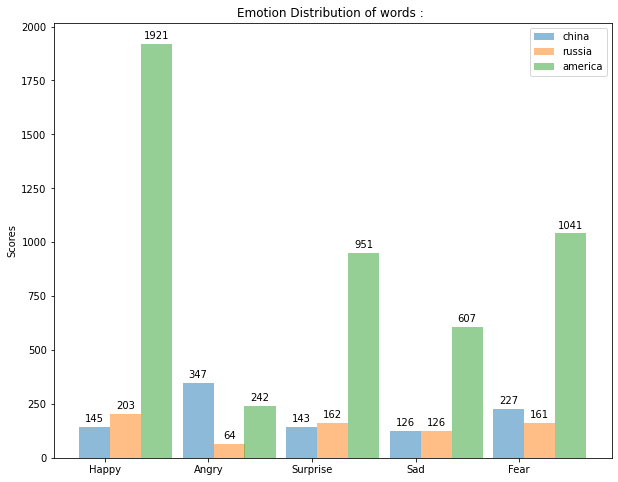

In [34]:
list1 = ['china','russia','america']
plot_words_emotion(list1,clean_tw)

# How you doing after election day?

In [35]:
sorted_tw = trump.sort_values(by='date',ascending=False)

In [36]:
sorted_tw=sorted_tw.loc[(sorted_tw['date'] >= '2020-11-02 00:00:00')]
sorted_tw.head()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date
1091,1324768077939118083,Where are the missing military ballots in Geor...,f,f,Twitter for iPhone,319830,69266,2020-11-06 17:38:17
1090,1324752659996397575,With the attack by the Radical Left Dems on th...,f,f,Twitter for iPhone,256141,45857,2020-11-06 16:37:01
1086,1324750565092610048,....hopefully this will be corrected at the Su...,f,f,Twitter for iPhone,113524,22224,2020-11-06 16:28:42
1085,1324750568817102852,....has been able to render decisions in a mat...,f,f,Twitter for iPhone,102067,19257,2020-11-06 16:28:42
1087,1324750561514848256,"....Legislature. They just ignored that, ignor...",f,f,Twitter for iPhone,53553,13287,2020-11-06 16:28:41


In [37]:
ele_tw = []
for ind in sorted_tw.index:
    ele_tw.append(cleaning(sorted_tw['text'][ind]))    

dtm_tf_ele = tf_vectorizer.fit_transform(ele_tw)
lda_tf.fit(dtm_tf_ele)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [38]:
ele_vis = pyLDAvis.sklearn.prepare(lda_tf, dtm_tf_ele, tf_vectorizer, mds='tsne')
ele_info = ele_vis.topic_info

In [39]:
ele_info

,Term,Freq,Total,Category,logprob,loglift
10,state,22.000000,22.000000,Default,15.0000,15.0000
12,vote,52.000000,52.000000,Default,14.0000,14.0000
8,pennsylvania,20.000000,20.000000,Default,13.0000,13.0000
2,biden,31.000000,31.000000,Default,12.0000,12.0000
4,great,16.000000,16.000000,Default,11.0000,11.0000
...,...,...,...,...,...,...
4,great,0.249367,16.835404,Topic5,-4.8193,-1.9558
3,get,0.251431,17.468825,Topic5,-4.8110,-1.9845
1,american,0.248129,18.297258,Topic5,-4.8243,-2.0440
8,pennsylvania,0.249051,20.420956,Topic5,-4.8205,-2.1501


# Association rule mining
* In this section I want find out the association rules between hot terms.

However, our data is huge, the computation is too expensive. We cannot run tho

In [41]:
ele_df = pd.DataFrame(dtm_tf_ele.todense(), columns=tf_vectorizer.get_feature_names())

In [43]:
ele_df

,america,american,biden,get,great,joe,joe biden,michigan,pennsylvania,president,state,thank,vote,win,year
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
161,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
162,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
163,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
clmn = list(ele_df)
final_set = []
words_set = []
for ind in ele_df.index:
        for i in clmn:
            if(ele_df[i][ind]!=0):
                words_set.append(i)
        final_set.append(words_set)

In [45]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
import time
from mlxtend.frequent_patterns import apriori

te = TransactionEncoder()
te_ary = te.fit(final_set).transform(final_set)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [46]:
start_time = time.time()
frequent_itemsets = apriori(df, min_support=0.55, use_colnames=True)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.9879817962646484 seconds ---


In [ ]:
# This step crush.
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)